Total episodes:  120


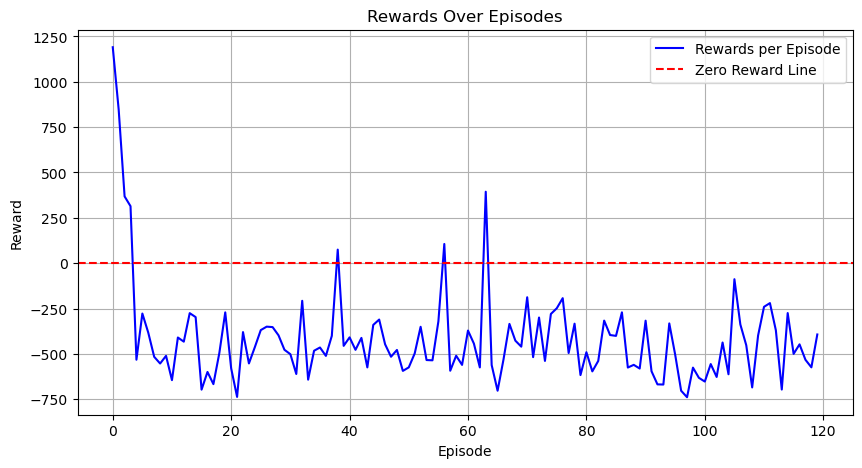

In [326]:
from matplotlib import pyplot as plt
import numpy as np

log_file_paths = ["/Users/danielemateria/Desktop/q-learning-maze-robot/logs/training_20250616_122459.log"]

def extract_rewards_from_log(log_file_paths):
    rewards = np.array([])
    for log_file_path in log_file_paths:
        with open(log_file_path, 'r') as file:
            reward = None
            for line in file:
                if "|" in line:
                    line = line.split("|")
                    reward = line[1].strip()
                    parts = reward.split(":")
                    reward = float(parts[-1])
                    rewards = np.append(rewards, reward)
    return rewards

def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label='Rewards per Episode', color='blue')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Rewards Over Episodes')
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Reward Line')
    plt.legend()
    plt.grid()
    plt.show()
rewards = extract_rewards_from_log(log_file_paths)

print("Total episodes: ", len(rewards))
plot_rewards(rewards)